In [30]:
from PIL import Image, ImageOps
import numpy as np
import math
from collections import Counter
from IPython.display import display, Image
import cv2
from matplotlib import pyplot as plt
import sys
from scipy import ndimage

import imageio


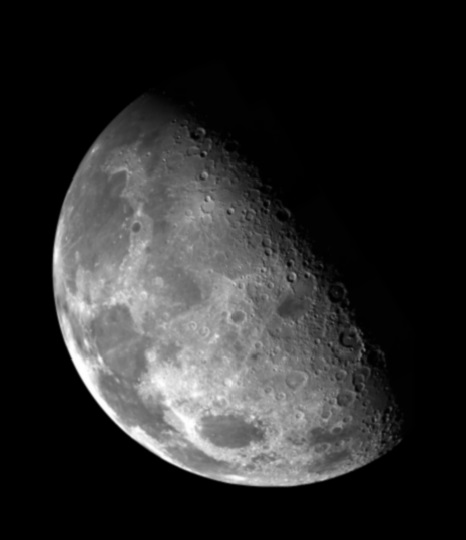

In [2]:
path = "images2\moon1.jpg"  # converted .tif to .jpg
img  = Image.open(path) 
img_w, img_h = img.size
img = ImageOps.grayscale(img)
img

In [3]:
print('Size of image: ',img.size)

Size of image:  (466, 540)


### Q1

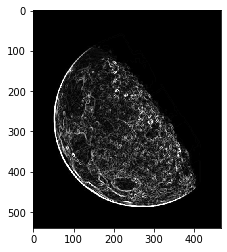

In [6]:
def sobelOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
    return container
    pass

img = cv2.cvtColor(cv2.imread("images2\moon1.jpg"), cv2.COLOR_BGR2GRAY)
img = sobelOperator(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()

### Q2

In [28]:
def LoG():

    ddepth = cv.CV_16S
    kernel_size = 3
    window_name = "Laplace Deneme"

    src = cv2.imread(cv.samples.findFile('images2\moon1.jpg'), cv.IMREAD_COLOR) # Load an image

    src = cv2.GaussianBlur(src, (3, 3), 0)
    
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    
    dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)

    abs_dst = cv2.convertScaleAbs(dst)
    
    cv2.imshow(window_name, abs_dst)
    cv2.waitKey(0)

In [29]:
LoG()

### Q3

In [4]:
def snr(img):
    
    img = np.array(img)
    mean = img.mean()
    std = img.std()
    snr = mean/std
    
    return snr

In [5]:
snr_val = snr(img)
print('SNR: ', snr_val)

SNR:  0.6616886332115782


### Q5

In [60]:
def plot(image, title):
    plot.i += 1
    plt.subplot(2, 2, plot.i)
    plt.imshow(image)
    plt.gray()
    plt.title(title)
plot.i = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RuntimeError: filter weights array has incorrect shape.

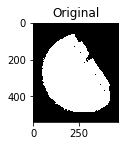

In [62]:
im = imageio.imread('images2\moon1.jpg')
data = np.array(im, dtype=float)

plot(data, 'Original')

# kernel = np.array([[0, -1, 0],
#                    [-1, 4, -1],
#                    [0, -1, 0]])
# high_pass_3x3 = ndimage.convolve(data, kernel)
# plot(high_pass_3x3, 'Simple 3x3 High pass')

kernel = np.array([[-1, -1, -1, -1, -1],
                  [-1,  1,  2,  1, -1],
                  [-1,  2,  4,  2, -1],
                  [-1,  1,  2,  1, -1],
                  [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 High pass')
plt.show()

### Q6

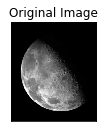

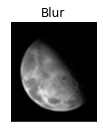

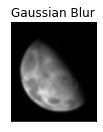

In [70]:
import cv2 
import matplotlib.pyplot as plt  
def low_pass(): 
    imgpath = "images2\moon1.jpg"     
    img = cv2.imread(imgpath, 1)     
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
    blur = cv2.blur(img, (13, 13))     
    gaussian = cv2.GaussianBlur(img, (37, 37), 0)     
    titles = ['Original Image', 'Blur', 'Gaussian Blur']     
    outputs = [img, blur, gaussian]     
    for i in range(3): 
        plt.subplot(2, 2, i+1)     
        plt.imshow(outputs[i])     
        plt.title(titles[i])     
        plt.xticks([])     
        plt.yticks([])     
        plt.show()     
if __name__ == "__main__": 
    low_pass() 